# Quickstart

In a nutshell, `marketmaps` provides a toolbox to explore market data in maps. 

Thereby, data comes in the form of either higher-dimensional attribute vectors, or in the form of pairwise relationships. 

Given such data, `marketmaps` provides a flexible set of tools to process and manipulate the data, map it to lower-dimensional space, evaluate and explore the resultant market maps.

For a very simplistic example, we generate a market map for a subsample of the TNIC data provided by Hoberg & Philips:

## Get the Data

The original data is provided at https://hobergphillips.tuck.dartmouth.edu/. Here, we use a small subsample of this data. This subsample is provided as part of this package.  

In [1]:
from marketmaps.datasets import load_TNIC_testdata
TNIC_testdata = load_TNIC_testdata()

In [2]:
S = TNIC_testdata['matrix']
labels = TNIC_testdata['labels']
cluster = TNIC_testdata['cluster']

## Preprocessing relationship data

In [3]:
from marketmaps.preprocessing import sim2dist
D = sim2dist(S)

## Mapping relationship data

In [4]:
from marketmaps.mapping import cmdscale
Y,_ = cmdscale(D)

## Drawing market maps

<AxesSubplot:title={'center':'Classic Scaling of TNIC Data'}>

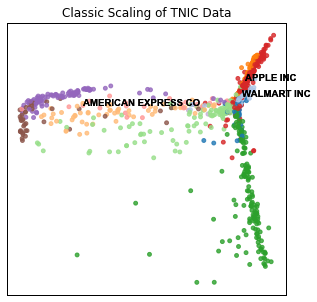

In [5]:
from marketmaps.printer import draw_map
draw_map(Y, cluster, 
         labels = labels, 
         annotate = 'labels', 
         highlight_labels = ['APPLE INC', 'WALMART INC', 'AMERICAN EXPRESS CO'], 
         title_str = "Classic Scaling of TNIC Data")